# Excercise 2a: Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
X_train = pd.read_csv("ex2_train.csv")
y_train = pd.read_csv("ex2_class_train.csv")
data = X_train.copy()
data['Survived'] = y_train # Adding the target variable to the data

In [3]:
data.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1,"Partner, Mr. Austen",male,45.5,0,0,28.5000,S,0
1,2,"Berriman, Mr. William John",male,23.0,0,0,13.0000,S,0
2,3,"Tikkanen, Mr. Juho",male,32.0,0,0,7.9250,S,0
3,3,"Hansen, Mr. Henrik Juul",male,26.0,1,0,7.8542,S,0
4,3,"Andersson, Miss. Ebba Iris Alfrida",female,6.0,4,2,31.2750,S,0


This is a widely used dataset that contains information on the passengers who were aboard the Titanic when it sank on its maiden voyage in 1912. We will use it for a supervised learning exercise (ex2b) to predict whether a passenger can survive based on his or her attributes. Before constructing the classifier, you need to do some guided exploratory data analysis in ex2a.

The column meanings are: 
* Survived: Survival status (0 = No, 1 = Yes).
* Pclass: Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd).
* Name: Name of the passenger.
* Sex: Gender of the passenger (male/female).
* Age: Age of the passenger in years.
* SibSp: Number of siblings/spouses aboard the Titanic.
* Parch: Number of parents/children aboard the Titanic.
* Fare: Passenger fare.
* Embarked: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton).

**TODO: Please answer the following questions by using suitable analysis tools, e.g. statistics or visualizations.** To pass the exercise, you need to correctly answer three or more of Questions 1 to 5. A correct answer includes a correct statement and the analysis result that support the statement.

# Example Question: Is gender related to survival rate?

Answer: Yes, females had a higher survival rate.

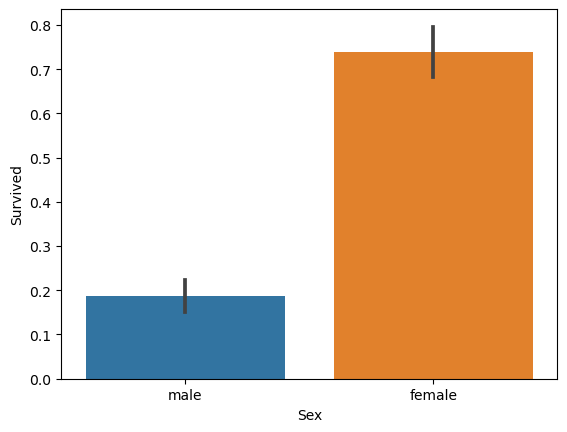

In [4]:
# Show the relevant statistics or visualization(s) to support your answer
sns.barplot(x='Sex', y='Survived', data=data)
plt.show()

# Question 1: Did first-class passengers survive more?

Answer: Yes, first-class passengers survived more, and 2nd class passengers survived more than 3rd class ones

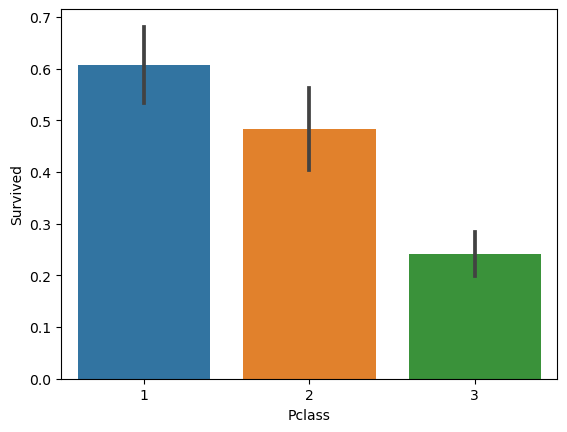

In [4]:
# Show the relevant statistics or visualization(s) to support your answer
sns.barplot(x='Pclass', y='Survived', data=data)
plt.show()

# Question 2: Is survival related to Embarked?

Answer: Yes, people embarked in Cherbourg have a higher survival rate than ones embarked in Queenstown or Southampton.

Note: It's not a direct correlation, but people embarked in Southampton always have lower survival rates, even inside of the same passenger class.

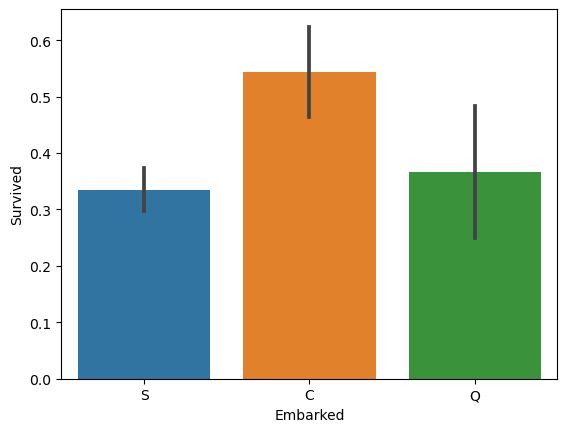

Embarked
C    0.544000
Q    0.366667
S    0.335238
Name: Survived, dtype: float64


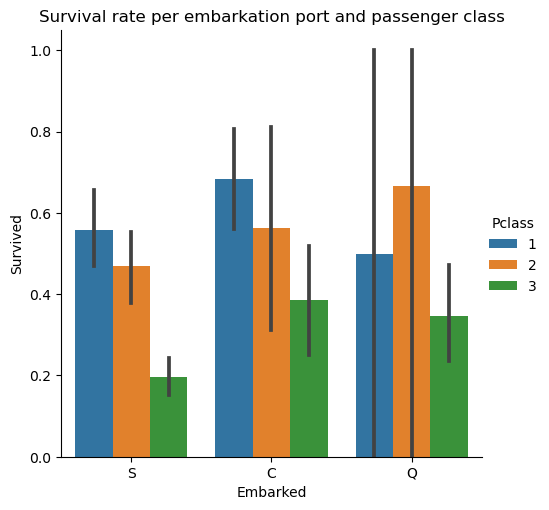

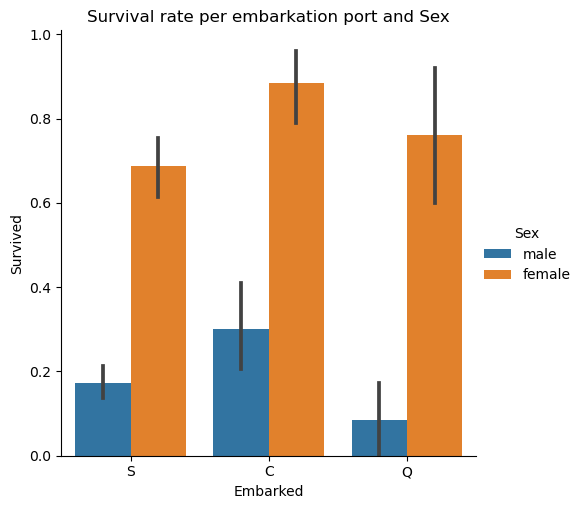

In [27]:
# Show the relevant statistics or visualization(s) to support your answer
sns.barplot(x='Embarked', y='Survived', data=data)
plt.show()

embarked_survival = data.groupby("Embarked")["Survived"].mean()
print(embarked_survival)

pd.crosstab(data["Embarked"], data["Pclass"], normalize="index")

data.groupby(["Embarked", "Pclass"])["Survived"].mean()

sns.catplot(x="Embarked", y="Survived", hue="Pclass", data=data, kind="bar")
plt.title("Survival rate per embarkation port and passenger class")
plt.show()


sns.catplot(x="Embarked", y="Survived", hue="Sex", data=data, kind="bar")
plt.title("Survival rate per embarkation port and Sex")
plt.show()

# Question 3: How is age related to survival?

Answer: The average age of survivors is slightly lower (28yo vs 30yo), also, from the boxplots we can see that the age distribution of survivors is slightly moved to lower ages. This could mean that indeed, lower age could lead to a slightly higher survival rate.

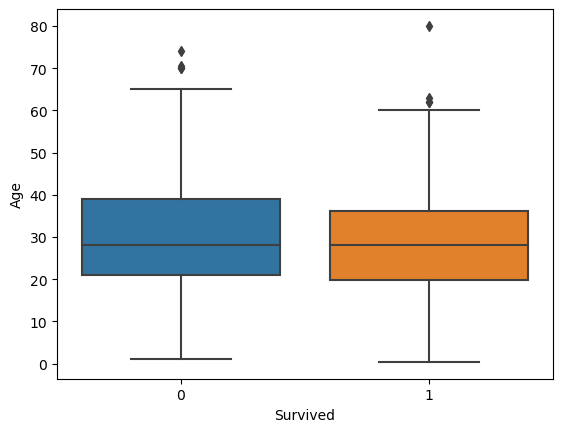

Mean age of survivors: 28.45189655172414
Mean age of non-survivors: 30.21323529411765


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, '0.0'),
  Text(1, 0, '5.0'),
  Text(2, 0, '10.0'),
  Text(3, 0, '15.0'),
  Text(4, 0, '20.0'),
  Text(5, 0, '25.0'),
  Text(6, 0, '30.0'),
  Text(7, 0, '35.0'),
  Text(8, 0, '40.0'),
  Text(9, 0, '45.0'),
  Text(10, 0, '50.0'),
  Text(11, 0, '55.0'),
  Text(12, 0, '60.0'),
  Text(13, 0, '65.0'),
  Text(14, 0, '70.0'),
  Text(15, 0, '80.0')])

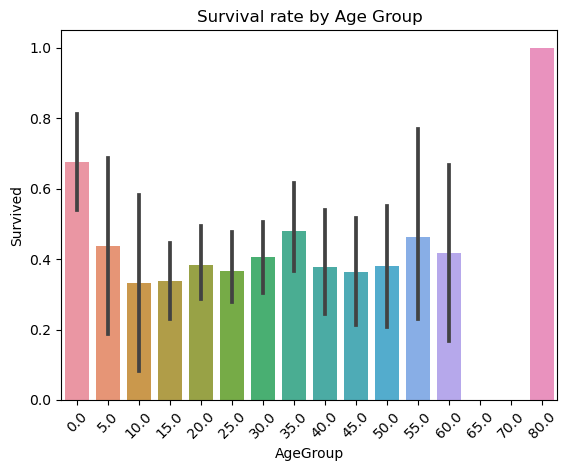

In [ ]:
# Show the relevant statistics or visualization(s) to support your answer
sns.boxplot(x='Survived', y='Age', data=data)
plt.show()
# Printing the mean age of survivors and non-survivors
print("Mean age of survivors:", data[data['Survived'] == 1]['Age'].mean())
print("Mean age of non-survivors:", data[data['Survived'] == 0]['Age'].mean())
# Printing plot of survival rate for each age group of 5 years
data['AgeGroup'] = (data['Age'] // 5) * 5
sns.barplot(x='AgeGroup', y='Survived', data=data)
plt.title("Survival rate by Age Group")
plt.xticks(rotation=45)

# Question 4: Does family size somehow affect the survival rate?

Answer: Yes, family size of 4 has the highest survival rate, followed by 2 and 3. After 5 the survival rate significantly drops.

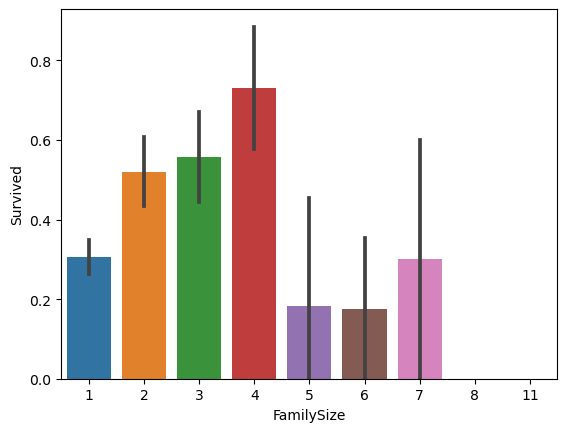

In [ ]:
# Show the relevant statistics or visualization(s) to support your answer
# Creating a new column for family size
data['FamilySize'] = data['SibSp'] + data['Parch'] + 1  # Adding 1 for the individual themselves
sns.barplot(x='FamilySize', y='Survived', data=data)
plt.show()


# Question 5: Some passengers with certain titles seemed to have more chance to survive. Is that true?

Answer: Yes, 100% of passengers with "Lady", "Mlle", "Mme", "Ms" and "the Countess" titles survived. Also "Mrs" survived with a 0.83 rate.

Title
Lady            1.000000
Mlle            1.000000
Mme             1.000000
Ms              1.000000
the Countess    1.000000
Mrs             0.833333
Miss            0.664336
Master          0.545455
Col             0.500000
Major           0.500000
Dr              0.400000
Mr              0.155131
Capt            0.000000
Rev             0.000000
Name: Survived, dtype: float64


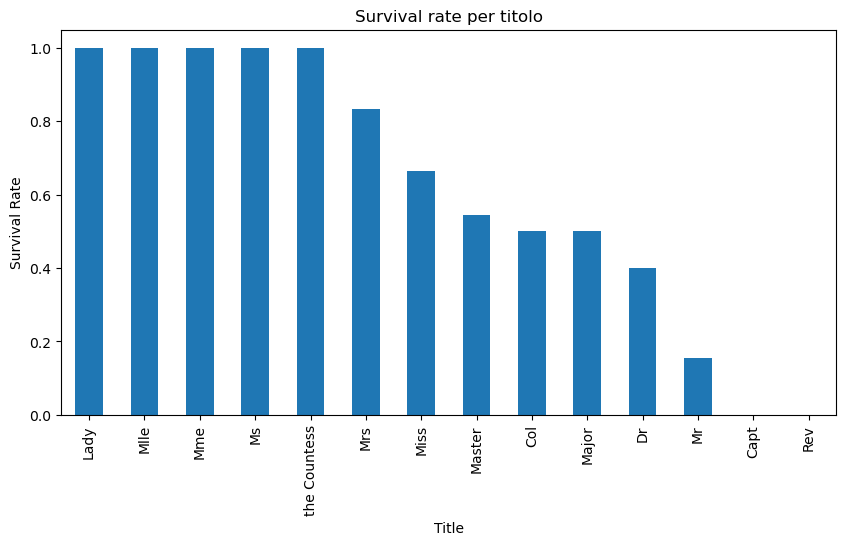

In [ ]:
# Show the relevant statistics or visualization(s) to support your answer
data["Title"] = data["Name"].str.extract(r",\s*([^\.]*)\.", expand=False).str.strip()

title_survival = data.groupby("Title")["Survived"].mean().sort_values(ascending=False)
print(title_survival)

title_survival.plot(kind="bar", figsize=(10,5))
plt.ylabel("Survival Rate")
plt.title("Survival rate per title")
plt.show()
